# Week 4 Conducting Statistical Tests in Python

We're going to demonstrate how you can carry out each of the three statistical tests we covered in the lecture. 

Whilst they are all very simple (small amounts of code), its very important your data is in the right format, and you have considered based on your experimental deisgn which test you are doing, and how you can interpret the results. Also, that your data meets the assumptions required for that particular test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generating some data

First we generate some fake data from the experiment using the `np.random.normal` function. Obviously in a real situation, you would use data that you had collected during your experiment. 

A **normal** distribution has a bell shape and is centered around a given average. We also specify a **standard deviation** from this mean, which basically tells us the spread.

Simluating our **between subjects** design, we make a set of results (how long each coversation lasted) for each group (wearing smart t shirts and not).

In [2]:
#We give a mean, and standard deviation and a number of values to generate
data_shirts = np.random.normal(5, 1.7, 100)
data_no_shirts = np.random.normal(4, 1.7, 100)

(array([ 2.,  1.,  3.,  2.,  4.,  7.,  8., 11., 11., 12.,  8.,  7.,  6.,
         6.,  5.,  2.,  3.,  0.,  1.,  1.]),
 array([0.28134622, 0.69544013, 1.10953404, 1.52362795, 1.93772186,
        2.35181577, 2.76590968, 3.18000359, 3.5940975 , 4.00819141,
        4.42228532, 4.83637923, 5.25047314, 5.66456705, 6.07866096,
        6.49275487, 6.90684878, 7.32094269, 7.7350366 , 8.14913051,
        8.56322442]),
 <BarContainer object of 20 artists>)

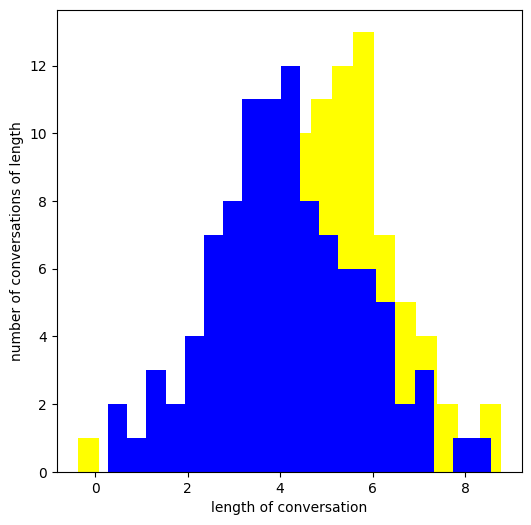

In [3]:
#Plot a histogram of data 
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel("length of conversation")
ax.set_ylabel("number of conversations of length")
#20 bins each
ax.hist(data_shirts, 20, color = "yellow")
ax.hist(data_no_shirts, 20, color = "blue")

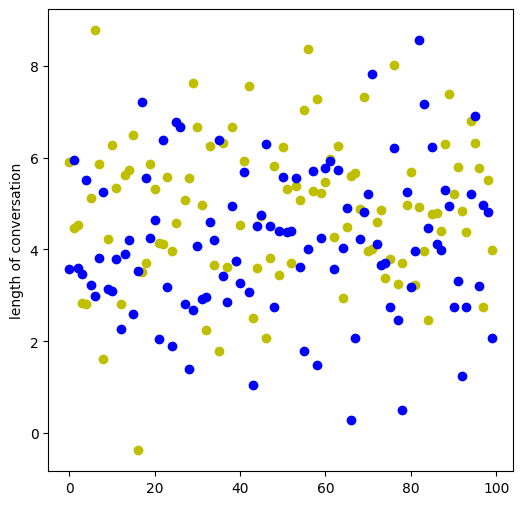

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylabel("length of conversation")
ax.plot(data_shirts, "yo")
ax.plot(data_no_shirts, "bo")

### Error bars

We calculate the error based on the **standard deviation** of each group, also factoring in the number of samples in the each group. 

We can then draw the errors on our chart.

<BarContainer object of 2 artists>

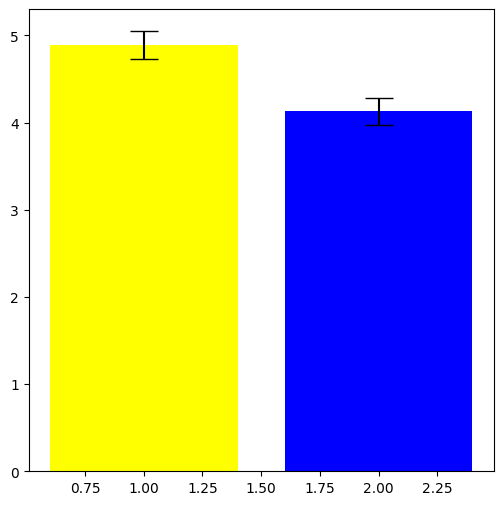

In [5]:
errors = [np.std(data_shirts)/np.sqrt(len(data_shirts)), np.std(data_no_shirts)/np.sqrt(len(data_no_shirts))]
means = [np.mean(data_shirts), np.mean(data_no_shirts)]
fig, ax = plt.subplots(figsize=(6,6))
ax.bar([1,2], means, yerr=errors, align='center', capsize=10, color = ["yellow","blue"])

### T - Test

For our between subjects design with two groups, we use a **T-Test**. A **p-value** of <0.05 returned from the test will allow us to reject the **null hypothesis** that that there is no difference between the means of the two groups. Thus we can say with reasonable confidence that the independent variable (t-shirt or not) effected our dependent variable (length of conversation)

We use the following method from the SciPy library. 

We can only do this if the data is 
- independent
- from a normal distribution 
- has equal variances 

In [6]:
from scipy import stats
#t test for between subjects, two groups
stats.ttest_ind(data_shirts, data_no_shirts)

Ttest_indResult(statistic=3.404577907622636, pvalue=0.0008021368826059965)

### Paired T - Test

If we conducted a within subjects design with two groups, we use a **Paired T-Test**. For example, if we updated our experiment so that every participant took part in both conditions.

A **p-value** of <0.05 returned from the test will allow us to reject the **null hypothesis** that that there is no difference between the means of the two measurements taken from each participant. Thus we can say with reasonable confidence that the independent variable (t-shirt or not) effected our dependent variable (length of conversation)

We use the following method from the SciPy library. 

In [7]:
data_shirts.shape, data_no_shirts.shape

((100,), (100,))

In [8]:
#Paired t test for within subjects, two groups
stats.ttest_rel(data_shirts, data_no_shirts)

Ttest_relResult(statistic=3.3541302681897514, pvalue=0.001129403991832579)

### ANOVA

If we conducted a between subjects design with **more than two groups**, we use a **ANOVA**. For example, if we updated our experiment so we tested with a t shirt, without a t shirt and with a t shirt with a new design. 


A **p-value** of <0.05 returned from the test will allow us to reject the **null hypothesis** that that the all the means are equal between every group. Thus we can say with reasonable confidence that the independent variable (type of tshirt) effected our dependent variable (length of conversation)


We can only do this if the data is 
- independent
- from a normal distribution 
- has equal variances 

In [9]:
#Generate new data
data_shirts = np.random.normal(2.1, 1.7, 100)
data_no_shirts = np.random.normal(2.9, 1.7, 100)
data_new_design = np.random.normal(2.9, 1.7, 100)
#ANOVA for between subjects, more than 2 groups
stats.f_oneway(data_shirts, data_no_shirts, data_new_design)

F_onewayResult(statistic=13.543633674447484, pvalue=2.349796962925663e-06)